## Use of the Python xray Package

The xray package provides for handling of N-dimensional datasets as numpy arrays, but with each axis dimension labelled for mnemonic access and enhanced broadcasting. For more information see the xray project on Github at https://github.com/xray/xray

In [9]:
import numpy as np
import pandas as pd
import xray
xD = xray.DataArray
import matplotlib.pyplot as plt
import scipy.interpolate
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
def U_(units):
    return Q_(1.0, units)
%matplotlib inline
from morticia.tools.xd import *
%matplotlib inline
%load_ext autoreload
%aimport morticia.tools.xd
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Build a spectral transmission curve with an xray.DataArray object
# The first paramter is the transmission data, followed by a list of tuples providing the coordinate axes
# In this case there is only the wavelength axis, for which the abbreviation 'wvl' is used
# Attributes for the axis are provided in a dictionary, according to NetCDF conventions and CF conventions
# where appropriate
spec_trans = xray.DataArray([ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],                      
                   [('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000], {'units': 'nm', 'long_name': 'Wavelength'})], 
                   name='trn',
                   attrs={'units': '', 'long_name': 'Transmission'})

# It is also possible to create an "identity" DataArray in which the coordinates are just indices
spatial_frequencies = xray.DataArray(np.linspace(0.0, 1000.0, 11), name='spf', attrs={'units': 'cy/mm'})

In [20]:
# Attributes can be accessed using .long_name syntax for reading, but not for writing
spec_trans['wvl'].long_name

'Wavelength'

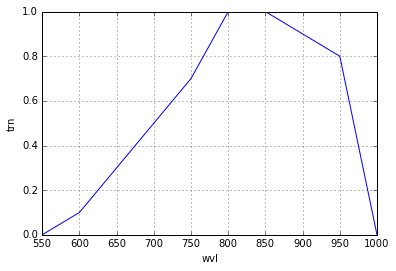

In [21]:
# Coordinate axis names are used to plot the data
spec_trans.plot()
plt.grid()

In [22]:
# Get values of a coordinate axis by name
spec_trans.coords['wvl']

<xray.DataArray 'wvl' (wvl: 9)>
array([  550.,   600.,   650.,   700.,   750.,   800.,   850.,   950.,
        1000.])
Coordinates:
  * wvl      (wvl) float64 550.0 600.0 650.0 700.0 750.0 800.0 850.0 950.0 1e+03
Attributes:
    units: nm
    long_name: Wavelength

In [23]:
# Determin the coordinate axes (dimensions) of the spectral transmission (wavelength only)
spec_trans.dims

('wvl',)

In [28]:
# For reading attributes, there are two available routes
print spec_trans.attrs['long_name'], ' or ... '
print spec_trans.long_name


Transmission  or ... 
Transmission


In [29]:
# Create a new wavelength grid
wvl = xray.DataArray(np.linspace(500., 1050, 51), name='wvl', attrs={'units': 'nm'})

In [30]:
wvl


<xray.DataArray 'wvl' (dim_0: 51)>
array([  500.,   511.,   522.,   533.,   544.,   555.,   566.,   577.,
         588.,   599.,   610.,   621.,   632.,   643.,   654.,   665.,
         676.,   687.,   698.,   709.,   720.,   731.,   742.,   753.,
         764.,   775.,   786.,   797.,   808.,   819.,   830.,   841.,
         852.,   863.,   874.,   885.,   896.,   907.,   918.,   929.,
         940.,   951.,   962.,   973.,   984.,   995.,  1006.,  1017.,
        1028.,  1039.,  1050.])
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    units: nm

In [31]:
# Here we have a transmission DataArray for 2 lens systems, labelled A and B
trans = xray.DataArray([[ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],
                             [ 0.0, 0.2, 0.5, 0.7, 0.72, 0.7, 0.7, 0.6, 0.5]],                      
                   [('idn', ['A', 'B']),
                    ('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000], {'units': 'nm'})], 
                   name='trn',
                   attrs={'units': '', 'extrap_val': 0.0})

In [32]:
# Trapzoidal integration of an xray DataArray along a named axis
# However, this returns a regular numpy array integrated along the named axis
np.trapz(trans, axis=trans.get_axis_num('wvl'))

array([ 4.4 ,  4.37])

In [33]:
# Latter integration result is wrong because we failed to take into account the actual coordinates
# in the wavelength axis, so here we do the integration again, using the wavelength values
# as a further input
# Read the following statement as "Perform trapezoidal integration of the DataArray 'trans' along the axis named 'wvl'"
np.trapz(trans, trans['wvl'], axis=trans.get_axis_num('wvl'))

array([ 265.,  251.])

In [ ]:
plt.plot(trans['wvl'], trans.loc['A'], trans['wvl'], trans.loc['B'])

In [ ]:
# Index into the data using loc
trans.loc['A']

In [ ]:
# Attributes in the attrs dictionary turn up as top-level attributes
trans.wvl_units

In [ ]:
spec_trans['wvl'] = np.array([1.,2,3,4,5,6,7,8,9])

In [ ]:
spec_trans

In [ ]:
xD_check_convert_units(spec_trans, 'wvl', 'nm')

In [48]:
from morticia.sensor import optics
import xray
# This notebook is used for development/testing of the Optics module, so auto reload the Optics module if it changes
%load_ext autoreload
%aimport morticia.sensor.optics
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [226]:
# Here, we show the product of two transmission functions defined on different wavelength grids
spec_transA = xray.DataArray([ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],                      
                   [('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000])], 
                   name='trn',
                   attrs={'trn_units': '1', 'wvl_units': 'nm', 'extrap_val': 0.0})
spec_transB = xray.DataArray([ 0.0, 0.5, 0.3, 0.25, 0.4, 0.45, 0.6, 0.7],                      
                   [('wvl', [551., 600, 660, 715, 755, 845, 851, 956])], 
                   name='trn',
                   attrs={'trn_units': '', 'wvl_units': 'nm', 'extrap_val': 0.0})

In [227]:
# Look at what the xray.DataArray objects look like with harmonised wavelength grids 
xd_harmonise_interp((spec_transA, spec_transB))

[<xray.DataArray 'trn' (wvl: 16)>
 array([ 0.   ,  0.002,  0.1  ,  0.3  ,  0.34 ,  0.5  ,  0.56 ,  0.7  ,
         0.73 ,  1.   ,  1.   ,  1.   ,  0.998,  0.8  ,  0.704,  0.   ])
 Coordinates:
   * wvl      (wvl) float64 550.0 551.0 600.0 650.0 660.0 700.0 715.0 750.0 ...
 Attributes:
     extrap_val: 0.0
     trn_units: 1
     wvl_units: nm, <xray.DataArray 'trn' (wvl: 16)>
 array([ 0.        ,  0.        ,  0.5       ,  0.33333333,  0.3       ,
         0.26363636,  0.25      ,  0.38125   ,  0.4       ,  0.425     ,
         0.45      ,  0.575     ,  0.6       ,  0.69428571,  0.7       ,  0.        ])
 Coordinates:
   * wvl      (wvl) float64 550.0 551.0 600.0 650.0 660.0 700.0 715.0 750.0 ...
 Attributes:
     extrap_val: 0.0
     trn_units: 
     wvl_units: nm]

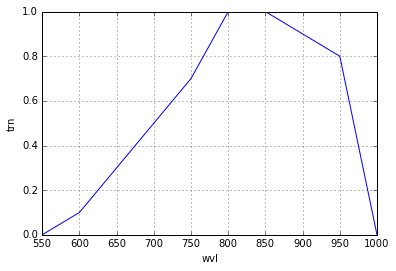

In [228]:
# Plot the A transmission curve
spec_transA.plot()
plt.grid()

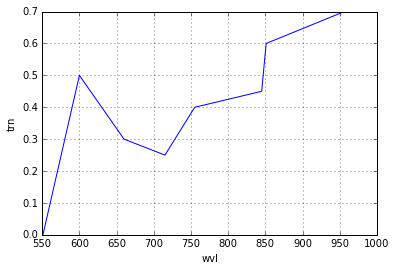

In [229]:
# Plot the B transmission curve
spec_transB.plot()
plt.grid()

In [230]:
# Get the axis-harmonised product
spec_transC = xd_harmonised_product([spec_transA, spec_transB])

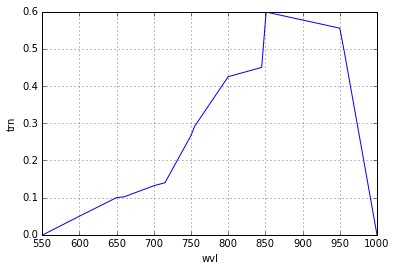

In [232]:
# Plot the product of the two transmission curves
spec_transC.plot()
plt.grid()